# Project: Analyzing movies in 2023 on The Movie Database (TMDb)

- Name: Lê Đức Cường
- Student code: 21120213
- Website I get data: https://www.themoviedb.org/

    **The Movie Database (TMDb)** is a collaborative film database. The project was founded in 2008 by Travis Bell to collect movie posters. The initial database was a donation from the free project Open Media Database (OMDb). This database has more 913000 movies (including the adults content). In this project, I analyze data about movies which are released in 2023.

## III.EXPLORING DATA

### 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### 2. Read processed data and answer some problems

In [2]:
df = pd.read_csv("../data/processed_data/movie_data_processed.csv")
df

,Title,Original title,ID,Language,Details,Genres,Popularity,Release date,Review score,Number of reviews
0,Rebel Moon - Part One: A Child of Fire,Rebel Moon - Part One: A Child of Fire,848326,English,When a peaceful colony on the edge of the gala...,['Science Fiction'],2811.615,2023-12-15,6.5,989
1,The Hunger Games: The Ballad of Songbirds & Sn...,The Hunger Games: The Ballad of Songbirds & Sn...,695721,English,64 years before he becomes the tyrannical pres...,"['Drama', 'Science Fiction', 'Action']",2632.389,2023-11-15,7.3,1306
2,The Family Plan,The Family Plan,1029575,English,"Dan Morgan is many things: a devoted husband, ...","['Action', 'Comedy']",2897.474,2023-12-14,7.4,559
3,Silent Night,Silent Night,891699,English,A tormented father witnesses his young son die...,"['Action', 'Crime']",1749.102,2023-11-30,5.8,228
4,Aquaman and the Lost Kingdom,Aquaman and the Lost Kingdom,572802,English,"Black Manta, still driven by the need to aveng...","['Action', 'Adventure', 'Fantasy']",1402.452,2023-12-20,6.5,368
...,...,...,...,...,...,...,...,...,...,...
1390,Return,Regreso,1140754,Spanish,Gerardo returns home with a pack of dogs barki...,['Drama'],0.648,2023-07-30,4.9,13
1391,Return of the Demojordan,Return of the Demojordan,1089674,English,After a narrow escape from the fearsome beast ...,"['Horror', 'Comedy']",1.400,2023-02-20,6.3,13
1392,CVLT,CVLT,1189988,Italian,NaN,['Horror'],1.400,2023-10-10,7.0,13
1393,Jump,Jump,1169582,Spanish,Mexico's National Auditorium offers a journey ...,"['Music', 'Documentary']",1.400,2023-02-15,7.3,12


### Questions and problems:

In this project, I want to know the popularity of movies in 2023 and the factors that influence them. First, I need to Identify possible influencing factors such as: the language of the film, the genres, the time a film was released or anything else. After that, I will look at how the other factors affect the popularity of a movie. Finally, I find out the key answer and useful information from the process to solve some real problems.
    
**1**. Which movie genre is the most in 2023?  
**2**. Does the title and language of the movie influence on popularity?  
**3**. Is the number of reviews and review score proportional to popularity?    
**4**. The movies in 2023 on the website mainly in which months?    
**5**. Does the details of a movie affect its popularity?

**From the above questions, what factors are needed to increase the popularity of a movie? What factors need to be improved and strengthened? And how does this help filmmakers?**

### 3. Exploring data by sloving above problems
    Here's what I need to do to explore the data and  answer all questions:    
- Draw some charts: line charts, bar charts, pie charts, histogram,...
- Do some statistics with numeric data.
- Find relationships in data fields.
- Search for more information to make a more objective and accurate assessment.
- Create related data fields from the original data.

   First of all, 'Popularity' field is the main factor to determine which movies are the most popular (After exploring data, I will redefine the main factor). Because this field is created from all rates in TMDb and it's useful for people don's have chance to collect and explore data. I will sort data in descending order of 'Popularity' and rechange the index value

In [3]:
df = df.sort_values('Popularity', ascending = False)
df = df.set_index(pd.Index(range(1, len(df) + 1)))
df

,Title,Original title,ID,Language,Details,Genres,Popularity,Release date,Review score,Number of reviews
1,The Family Plan,The Family Plan,1029575,English,"Dan Morgan is many things: a devoted husband, ...","['Action', 'Comedy']",2897.474,2023-12-14,7.4,559
2,Rebel Moon - Part One: A Child of Fire,Rebel Moon - Part One: A Child of Fire,848326,English,When a peaceful colony on the edge of the gala...,['Science Fiction'],2811.615,2023-12-15,6.5,989
3,The Hunger Games: The Ballad of Songbirds & Sn...,The Hunger Games: The Ballad of Songbirds & Sn...,695721,English,64 years before he becomes the tyrannical pres...,"['Drama', 'Science Fiction', 'Action']",2632.389,2023-11-15,7.3,1306
4,Silent Night,Silent Night,891699,English,A tormented father witnesses his young son die...,"['Action', 'Crime']",1749.102,2023-11-30,5.8,228
5,Aquaman and the Lost Kingdom,Aquaman and the Lost Kingdom,572802,English,"Black Manta, still driven by the need to aveng...","['Action', 'Adventure', 'Fantasy']",1402.452,2023-12-20,6.5,368
...,...,...,...,...,...,...,...,...,...,...
1391,Write Me A Letter When You Return Home,Write Me A Letter When You Return Home,1113693,English,75-year-old Enola Niaga finds comfort in writi...,['Drama'],0.960,2023-05-12,6.3,16
1392,Gli attassati,Gli attassati,1168807,Italian,NaN,['Comedy'],0.925,2023-08-31,5.0,11
1393,Return,Regreso,1140754,Spanish,Gerardo returns home with a pack of dogs barki...,['Drama'],0.648,2023-07-30,4.9,13
1394,What a Life!,Io vivo altrove!,1070244,Italian,"Biasutti and Perbellini have the same name, Fa...",['Comedy'],0.600,2023-01-19,5.7,10


In [4]:
df.head(1)

,Title,Original title,ID,Language,Details,Genres,Popularity,Release date,Review score,Number of reviews
1,The Family Plan,The Family Plan,1029575,English,"Dan Morgan is many things: a devoted husband, ...","['Action', 'Comedy']",2897.474,2023-12-14,7.4,559


The most popular movie is "The Family Plan" with 2897.474 popularity points, its title is the same with its original title. Review score of it is 7.4 and number of reviews is 559 votes.

In [5]:
df.tail(1)

,Title,Original title,ID,Language,Details,Genres,Popularity,Release date,Review score,Number of reviews
1395,Hombres hay muchos,Hombres hay muchos,1168735,Spanish,NaN,"['Comedy', 'Romance']",0.6,2023-08-01,7.0,12


The least popular movie in dataframe is "Hombres hay muchos" with only 0.6 popularity points, its title is also the same with its original title. Review score of it is 7.0 and number of reviews is 12 votes.

##### The first question: Which movie genre is the most in 2023?
A movie has one genre or many genres. I will classify into 2 groups: movies with 1 genre and movies with multiple genres. Then each group will perform statistics to see which category is the majority.

In [6]:
#Create a column named 'Num_Genres' to count genre of each movie
df['Num_Genres'] = df['Genres'].str.count(',') + 1

df['Genre_Category'] = df['Num_Genres'].apply(lambda x: 'One Genre' if x == 1 else 'Multiple Genres')

countGenre_Category = df['Genre_Category'].value_counts()
print("Movies with One Genre:", countGenre_Category['One Genre'])
print("Movies with Multiple Genres:", countGenre_Category['Multiple Genres'])
df

Movies with One Genre: 384
Movies with Multiple Genres: 1011


,Title,Original title,ID,Language,Details,Genres,Popularity,Release date,Review score,Number of reviews,Num_Genres,Genre_Category
1,The Family Plan,The Family Plan,1029575,English,"Dan Morgan is many things: a devoted husband, ...","['Action', 'Comedy']",2897.474,2023-12-14,7.4,559,2,Multiple Genres
2,Rebel Moon - Part One: A Child of Fire,Rebel Moon - Part One: A Child of Fire,848326,English,When a peaceful colony on the edge of the gala...,['Science Fiction'],2811.615,2023-12-15,6.5,989,1,One Genre
3,The Hunger Games: The Ballad of Songbirds & Sn...,The Hunger Games: The Ballad of Songbirds & Sn...,695721,English,64 years before he becomes the tyrannical pres...,"['Drama', 'Science Fiction', 'Action']",2632.389,2023-11-15,7.3,1306,3,Multiple Genres
4,Silent Night,Silent Night,891699,English,A tormented father witnesses his young son die...,"['Action', 'Crime']",1749.102,2023-11-30,5.8,228,2,Multiple Genres
5,Aquaman and the Lost Kingdom,Aquaman and the Lost Kingdom,572802,English,"Black Manta, still driven by the need to aveng...","['Action', 'Adventure', 'Fantasy']",1402.452,2023-12-20,6.5,368,3,Multiple Genres
...,...,...,...,...,...,...,...,...,...,...,...,...
1391,Write Me A Letter When You Return Home,Write Me A Letter When You Return Home,1113693,English,75-year-old Enola Niaga finds comfort in writi...,['Drama'],0.960,2023-05-12,6.3,16,1,One Genre
1392,Gli attassati,Gli attassati,1168807,Italian,NaN,['Comedy'],0.925,2023-08-31,5.0,11,1,One Genre
1393,Return,Regreso,1140754,Spanish,Gerardo returns home with a pack of dogs barki...,['Drama'],0.648,2023-07-30,4.9,13,1,One Genre
1394,What a Life!,Io vivo altrove!,1070244,Italian,"Biasutti and Perbellini have the same name, Fa...",['Comedy'],0.600,2023-01-19,5.7,10,1,One Genre


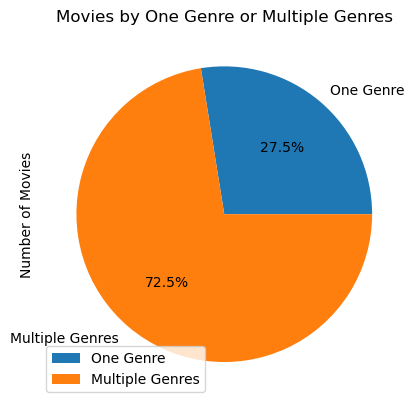

In [7]:
genre_df = pd.DataFrame({'Genre': ['One Genre', 'Multiple Genres'], 'Number of Movies': [384, 1011]})
genre_pie = genre_df.plot.pie(y = 'Number of Movies', labels = genre_df['Genre'], autopct = '%1.1f%%')
genre_pie.set_title('Movies by One Genre or Multiple Genres');

In [8]:
min_popularity_by_genre = df.groupby('Genre_Category')['Popularity'].min()
max_popularity_by_genre = df.groupby('Genre_Category')['Popularity'].max()
average_popularity_by_genre = df.groupby('Genre_Category')['Popularity'].mean()

#Create a new dataframe 'month_popularity_df'
genre_popularity_df = pd.concat({'Min popularity': min_popularity_by_genre, 'Average popularity': average_popularity_by_genre, 'Max popularity': max_popularity_by_genre}, axis = 1) 
genre_popularity_df

,Min popularity,Average popularity,Max popularity
Genre_Category,,,
Multiple Genres,0.6,68.459329,2897.474
One Genre,0.6,29.034458,2811.615


- The 'Multiple Genres' movies make up the majority (about 3/4) and their 'Average popularity' is also double compared to One Genre. This indicates that 'Multiple Genres' movies have higher 'Popularity' compared to 'One Genre' movies."

In [9]:
#Count movies group by genre

##### The second question: Does the title and language of the movie influence on popularity?
I count the number of movies for each language and draw a bar chart to describe it. In this chart, I also draw a line chart to describe average popularity values by each language.

In [10]:
num_of_language = df['Language'].nunique()
print('Dataframe has', num_of_language, 'languages')

Dataframe has 44 languages


In [11]:
num_movies_of_language = df['Language'].value_counts()
average_popularity_by_language = df.groupby('Language')['Popularity'].mean()
NumMovies_AverPopular = pd.DataFrame({'Number of Movies': num_movies_of_language, 'Average Popularity': average_popularity_by_language})
NumMovies_AverPopular

,Number of Movies,Average Popularity
Language,,
Arabic,9,17.106556
Basque,1,8.079000
Bengali,1,30.598000
Bosnian,1,1.085000
Cantonese,5,27.161800
Catalan,2,12.936000
Danish,5,32.571000
Dutch,8,8.383125
English,683,92.808025


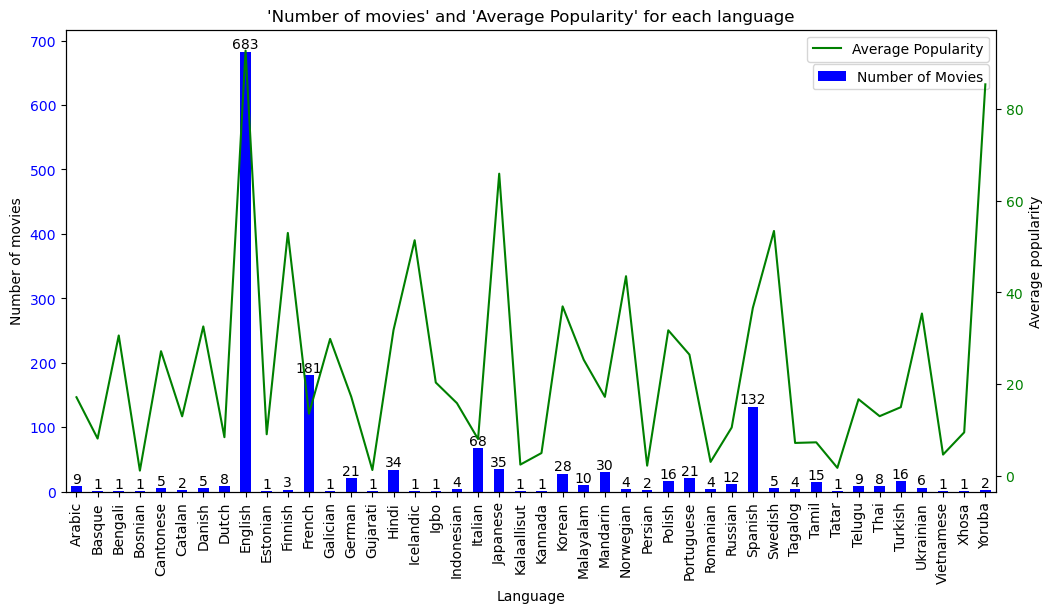

In [12]:
#Set size and name of chart
plt.figure(figsize=(12, 6))
plt.title('\'Number of movies\' and \'Average Popularity\' for each language')

#Bar chart
Bar_Chart = NumMovies_AverPopular['Number of Movies'].plot.bar(color = 'blue')
Bar_Chart.set_ylabel('Number of movies');
for i in Bar_Chart.containers:
    Bar_Chart.bar_label(i, label_type = 'edge')
    
Line_Chart = Bar_Chart.twinx()

#Line chart
Line_Chart = NumMovies_AverPopular['Average Popularity'].plot.line(color = 'green')
Line_Chart.set_xlabel('Language')
Line_Chart.set_ylabel('Average popularity')

    
Line_Chart.tick_params(axis = 'y', labelcolor = 'green')
Bar_Chart.tick_params(axis = 'y', labelcolor = 'blue')
Line_Chart.legend(loc = 'upper right', bbox_to_anchor = (1, 1))
Bar_Chart.legend(loc = 'upper right', bbox_to_anchor = (1, 0.94));

Looking at the chart:   

a. About number of movies in each language:
- 'English' is the most popular language among the movies released in 2023, with 683 films. The remaining languages in the top 5 are 'French' (181), 'Spanish' (132), 'Italian' (68), and 'Japanese' (35). 
- There are 13 languages represented by only one film each. The majority of languages have at least 20 films (34 languages).     
- 'English' along with languages using Latin script dominate the majority on TMDb. Languages with logographic writing systems such as 'Japanese', 'Hindi', 'Korean' follow closely with nearly 100 films.   

b. About average popularity group by language:
- 'English' is also the language with the highest average popularity. However, other languages such as 'Italian' or 'French' have lower average popularity values than many other languages.
- 'Yoruba' is the language with the second highest average popularity value. This is the language of Nigeria, a less popular language and the number of movies in this language is also very small. However, the average popularity value is very high.
- Ranked 3rd and 4th were 'Japanese' and 'Swedish' respectively.

     From there, it can be observed that the popularity of a movie is somewhat influenced by the original language of that movie. However, there are still many exceptions such as 'Yoruba' or 'Swedish'.

In terms of movie titles, I will calculate the number of films where the 'Title' matches the 'Original title' and the number of films where there's a difference between these two factors.

In [13]:
num_same_title = 0
popularity_same_title = []
num_diff_title = 0
popularity_diff_title = []

for i in range(1, df.shape[0] + 1):
    check_same_title = df.at[i, 'Title'] == df.at[i, 'Original title']
    if check_same_title:
        num_same_title += 1
        popularity_same_title.append(df.at[i, 'Popularity'])
    else:
        num_diff_title += 1
        popularity_diff_title.append(df.at[i, 'Popularity'])
print('The number of movies have \'Title\' same with \'Original title\':', num_same_title)
print('The number of movies have \'Title\' not same with \'Original title\':', num_diff_title)

The number of movies have 'Title' same with 'Original title': 891
The number of movies have 'Title' not same with 'Original title': 504


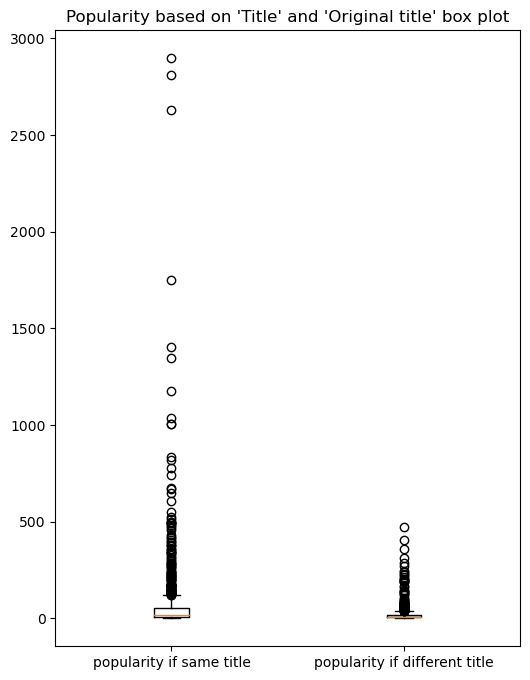

In [14]:
plt.figure(figsize=(6, 8))
plt.boxplot([popularity_same_title, popularity_diff_title])
plt.xticks([1, 2], ['popularity if same title', 'popularity if different title'])
plt.title('Popularity based on \'Title\' and \'Original title\' box plot');

Looking at the box plot, we can observe that movies with 'Title' matching the 'Original title' tend to have higher 'Popularity' values compared to movies where the 'Title' differs from the 'Original title'. This suggests that original movies often have higher popularity than those that have undergone translation or language alteration. Therefore, movies converted into other languages are not really popular in 2023.

##### The third question:  Is the number of reviews and review score proportional to popularity?
To answer this question, I draw some chart and evaluate them.

Firstly, I draw a histogram about 'Review score'.  
Next, I draw a box plot about 'Number of reviews'.  
Lastly, I draw 2 scatterplot chart to show the relationship between them: ('Review score' and 'Popularity'), ('Number of reviews' and 'Popularity')

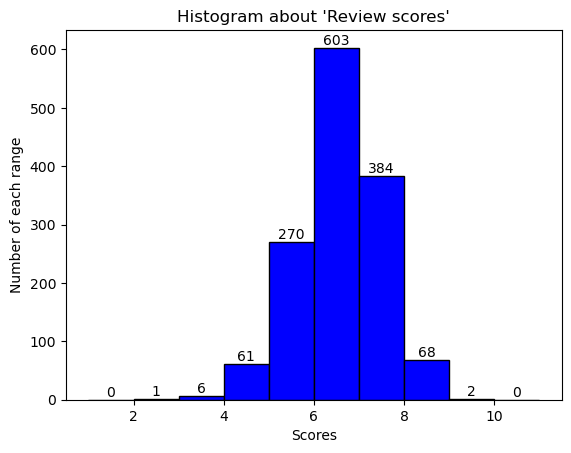

In [15]:
#Histogram
hist, bins, _ = plt.hist(df['Review score'], bins = 10, range = (1, 11), color = 'blue', edgecolor = 'black')

for i in range(len(hist)):
    plt.text(bins[i] + 0.5, hist[i], str(int(hist[i])), ha = 'center', va = 'bottom')
    
plt.xlabel('Scores')
plt.ylabel('Number of each range')
plt.title('Histogram about \'Review scores\'');

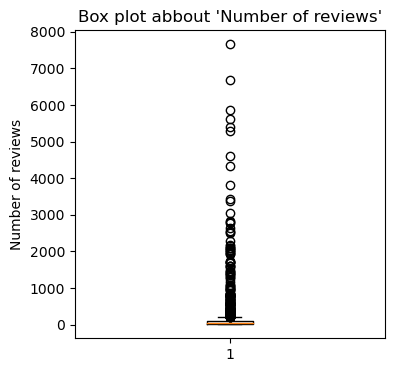

In [16]:
#Box plot
plt.figure(figsize = (4, 4))
plt.boxplot(df['Number of reviews'])
plt.ylabel('Number of reviews')
plt.title('Box plot abbout \'Number of reviews\'');

Based on the two charts above, we observe that:
- The 'Review scores' mainly range from 4.0 to 9.0 points and are most concentrated within the range of 6.0 to 7.0 points.
- The 'Number of reviews' values mainly range from 10 to 2000. There are only about 8 movies that have a 'Number of reviews' higher than 4000.

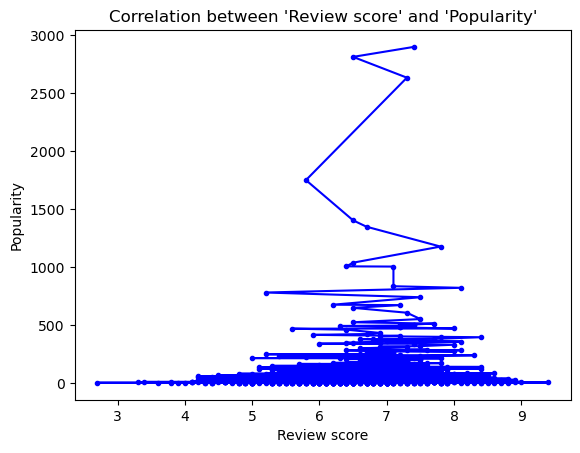

In [17]:
plt.plot(df['Review score'], df['Popularity'], marker = '.', linestyle = '-', color = 'blue')
plt.xlabel('Review score')
plt.ylabel('Popularity')
plt.title('Correlation between \'Review score\' and \'Popularity\'');

- The movies with a 'Popularity' above 500 have review scores ranging from 5.0 to about 8.5. The assessment of the 'Review score' in these movies is relatively accurate because of their high 'Popularity,' indicating a higher level of objectivity. Therefore, movies with 'Review scores' between 6.0 and 8.0 tend to receive higher 'Popularity' ratings compared to other score ranges.

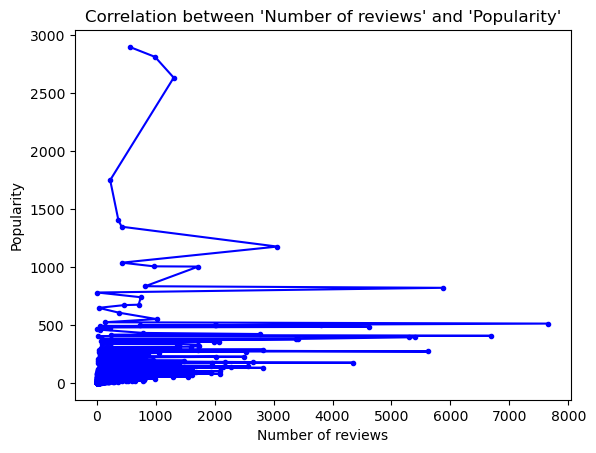

In [18]:
plt.plot(df['Number of reviews'], df['Popularity'], marker = '.', linestyle = '-', color = 'blue')
plt.xlabel('Number of reviews')
plt.ylabel('Popularity')
plt.title('Correlation between \'Number of reviews\' and \'Popularity\'');

- Based on the chart, it's evident that a high 'Number of reviews' doesn't necessarily equate to high 'Popularity'. For instance, the highest 'Number of reviews' only corresponds to a 'Popularity' value of around 500, which is 1/6th compared to the highest value. Meanwhile, movies with the highest 'Popularity' have fewer than 1000 'Number of reviews'. Therefore, it can be observed that the 'Number of reviews' doesn't significantly impact the 'Popularity' of a movie.

##### The forth question: The movies in 2023 on the website mainly in which months? 
I change the data type from string to datetime type and statistics for each month. After that, I calculate the percentage for each month and draw a bar chart to show the relation between months.

In [19]:
#Change data type and create a new column: 'Release month'
df['Release date'] = pd.to_datetime(df['Release date'])
df['Release month'] = df['Release date'].dt.month
movies_in_month = df['Release month'].value_counts().sort_index()

#Calculate max, min and average popularity values each month
min_popularity_in_month = df.groupby('Release month')['Popularity'].min()
max_popularity_in_month = df.groupby('Release month')['Popularity'].max()
average_popularity_in_month = df.groupby('Release month')['Popularity'].mean()

#Calculate percentage each month
percentages = (movies_in_month / movies_in_month.sum()) * 100

#Create a new dataframe 'month_popularity_df'
month_popularity_df = pd.concat({'Number of  movies': movies_in_month, 'Percentage in a year': percentages, 'Min popularity': min_popularity_in_month, 'Average popularity': average_popularity_in_month, 'Max popularity': max_popularity_in_month}, axis = 1) 
month_popularity_df

,Number of movies,Percentage in a year,Min popularity,Average popularity,Max popularity
Release month,,,,,
1,146,10.465950,0.600,18.521027,188.493
2,131,9.390681,1.085,15.427427,174.841
3,166,11.899642,1.210,22.812054,397.588
4,150,10.752688,1.157,30.906107,512.171
5,88,6.308244,0.960,38.114466,484.468
6,104,7.455197,1.446,49.117067,495.760
7,111,7.956989,0.648,54.888982,820.628
8,110,7.885305,0.600,59.360409,497.311
9,131,9.390681,1.310,76.270931,1005.730


- The movies tend to be released in the first quarter of 2023. However, in the last two months of 2023, very few movies were released. However, the early months of 2023 didn't yield high values for 'Average popularity'. Conversely, the last two months of 2023 exhibited remarkably high 'Average popularity', especially in December - a month with the least number of movie releases.
- The minimum and maximum 'Popularity' values within December also correspond to the highest values in the 'Min popularity' and 'Max popularity' columns. The 'Average popularity' tends to escalate month by month, reaching its peak in December.
- Hence, it can be observed that the latter part of the year is when movies gain more popularity and attention. This might be due to an improvement in the quality of movies compared to those released earlier in 2023.

##### The fifth question: Does the details of a movie affect its popularity?
The last factor is 'Details'. Now I will analyst this column. First I find all movies do not have 'Details'.

In [20]:
df[df.isnull().any(axis=1)]

,Title,Original title,ID,Language,Details,Genres,Popularity,Release date,Review score,Number of reviews,Num_Genres,Genre_Category,Release month
276,Los Habitantes,Los Habitantes,1105902,Spanish,NaN,"['Thriller', 'Horror']",52.728,2023-04-27,6.8,59,2,Multiple Genres,4
557,Reunión 10 años – No se aceptan devoluciones,Reunión 10 años – No se aceptan devoluciones,1186774,Spanish,NaN,['Comedy'],17.900,2023-10-03,7.7,23,1,One Genre,10
646,Santocielo,Santocielo,1128668,Italian,NaN,['Comedy'],14.329,2023-12-14,6.7,23,1,One Genre,12
748,Malcriados,Malcriados,1086990,Spanish,NaN,['Comedy'],11.315,2023-02-15,7.7,47,1,One Genre,2
825,Napoli milionaria!,Napoli milionaria!,1216937,Italian,NaN,"['Drama', 'TV Movie']",8.875,2023-12-18,6.3,11,2,Multiple Genres,12
996,Mia,Mia,1070784,Italian,NaN,['Drama'],6.091,2023-04-06,7.4,59,1,One Genre,4
1098,Kepler Sexto B,Kepler Sexto B,1096316,Spanish,NaN,"['Drama', 'Science Fiction']",4.816,2023-06-16,6.9,10,2,Multiple Genres,6
1134,"Io, noi e Gaber","Io, noi e Gaber",1183354,Italian,NaN,['Documentary'],4.392,2023-11-06,8.0,12,1,One Genre,11
1152,Nato 0. El origen del mal,Nato 0. El origen del mal,1137325,Spanish,NaN,['Thriller'],4.197,2023-02-25,5.3,12,1,One Genre,2
1178,Amor sin sentido,Amor sin sentido,1166740,Spanish,NaN,"['Romance', 'Comedy']",3.895,2023-09-28,6.9,16,2,Multiple Genres,9


The most 'Popularity' in the ranking list is ranked 276th. Moreover, among the 395 films in the lower half of the list, 16 out of 22 films do not have 'Details'.

Now, let's consider the movies with 'Details' over 150 characters and the movies with 'Details' less than or equal to 150 characters.

In [21]:
df = df.dropna()
df

,Title,Original title,ID,Language,Details,Genres,Popularity,Release date,Review score,Number of reviews,Num_Genres,Genre_Category,Release month
1,The Family Plan,The Family Plan,1029575,English,"Dan Morgan is many things: a devoted husband, ...","['Action', 'Comedy']",2897.474,2023-12-14,7.4,559,2,Multiple Genres,12
2,Rebel Moon - Part One: A Child of Fire,Rebel Moon - Part One: A Child of Fire,848326,English,When a peaceful colony on the edge of the gala...,['Science Fiction'],2811.615,2023-12-15,6.5,989,1,One Genre,12
3,The Hunger Games: The Ballad of Songbirds & Sn...,The Hunger Games: The Ballad of Songbirds & Sn...,695721,English,64 years before he becomes the tyrannical pres...,"['Drama', 'Science Fiction', 'Action']",2632.389,2023-11-15,7.3,1306,3,Multiple Genres,11
4,Silent Night,Silent Night,891699,English,A tormented father witnesses his young son die...,"['Action', 'Crime']",1749.102,2023-11-30,5.8,228,2,Multiple Genres,11
5,Aquaman and the Lost Kingdom,Aquaman and the Lost Kingdom,572802,English,"Black Manta, still driven by the need to aveng...","['Action', 'Adventure', 'Fantasy']",1402.452,2023-12-20,6.5,368,3,Multiple Genres,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,Çok Aşk,Çok Aşk,1086567,Turkish,Coşkun and his brother İrfan make a living sel...,"['Romance', 'Comedy']",1.077,2023-10-26,7.8,11,2,Multiple Genres,10
1390,Nata per te,Nata per te,1030531,Italian,Alba has Down syndrome and was left in the hos...,['Drama'],1.061,2023-10-05,7.8,14,1,One Genre,10
1391,Write Me A Letter When You Return Home,Write Me A Letter When You Return Home,1113693,English,75-year-old Enola Niaga finds comfort in writi...,['Drama'],0.960,2023-05-12,6.3,16,1,One Genre,5
1393,Return,Regreso,1140754,Spanish,Gerardo returns home with a pack of dogs barki...,['Drama'],0.648,2023-07-30,4.9,13,1,One Genre,7


In [22]:
details_over_150 = df[df['Details'].str.len() > 150]
details_150_or_less = df[df['Details'].str.len() <= 150]

average_popularity_over_150 = details_over_150['Popularity'].mean()
average_popularity_150_or_less = details_150_or_less['Popularity'].mean()
average_popularity_over_150 = details_over_150['Popularity'].min()
average_popularity_150_or_less = details_150_or_less['Popularity'].min()
average_popularity_over_150 = details_over_150['Popularity'].max()
average_popularity_150_or_less = details_150_or_less['Popularity'].max()

In [23]:
count_over_150 = details_over_150.shape[0]
count_150_or_less = details_150_or_less.shape[0]

data = {
    'Details': ['Details > 150 characters', 'Details <= 150 characters'],
    'Count': [count_over_150, count_150_or_less],
    'Average Popularity': [details_over_150['Popularity'].mean(), details_150_or_less['Popularity'].mean()],
    'Min Popularity': [details_over_150['Popularity'].min(), details_150_or_less['Popularity'].min()],
    'Max Popularity': [details_over_150['Popularity'].max(), details_150_or_less['Popularity'].max()]
}
detail_popularity_df = pd.DataFrame(data)
detail_popularity_df

,Details,Count,Average Popularity,Min Popularity,Max Popularity
0,Details > 150 characters,1087,62.437615,0.60,2897.474
1,Details <= 150 characters,285,43.280846,0.96,820.628


Dựa vào dataframe mới có thể thấy rằng, với các bộ phim có phần 'Details' với số ký tự lớn hơn 150 sẽ có 'Popularity' cao hơn nhiều so với các phim có phần 'Details' ngắn hơn. Do vậy, một phần 'Detais' đủ dài và chi tiết sẽ giúp phim có 'Popularity' cao hơn.

### 4. Results and conclusions

- From the analyses above, we observe several factors influencing 'Popularity'. The most impactful factors are 'Release month' and 'Multiple Genres'. Films released in the later months of the year and featuring 'Multiple Genres' tend to have higher chances of achieving higher 'Popularity' compared to others. Additionally, factors such as the 'Language,' specifically English or with detailed 'Details,' contribute to higher 'Popularity.' Meanwhile, the 'Number of reviews' and 'Review score' have the least impact on 'Popularity.'

- Based on these observations, the film trends in 2023 appear to favor:

+ Films with 'Multiple Genres.'
+ Launching films towards the end of the year for increased attention.
+ Films in 'English' or Latin languages for higher appeal.